# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | shahr-e babak
Processing Record 4 of Set 1 | stanley
Processing Record 5 of Set 1 | ilulissat
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | farah
Processing Record 8 of Set 1 | bel ombre
Processing Record 9 of Set 1 | daru
Processing Record 10 of Set 1 | valparaiso
Processing Record 11 of Set 1 | saudarkrokur
Processing Record 12 of Set 1 | petropavlovsk-kamchatsky
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | richards bay
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | ambon
Processing Record 18 of Set 1 | katsuren-haebaru
Processing Record 19 of Set 1 | matoury
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | solnechniy
City not found. Skipping...
Processing Recor

Processing Record 36 of Set 4 | baiti
Processing Record 37 of Set 4 | tura
Processing Record 38 of Set 4 | singrauli
Processing Record 39 of Set 4 | rongelap
Processing Record 40 of Set 4 | carnarvon
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | hayma'
City not found. Skipping...
Processing Record 43 of Set 4 | vilyuchinsk
Processing Record 44 of Set 4 | san lorenzo de esmeraldas
Processing Record 45 of Set 4 | midland
Processing Record 46 of Set 4 | al muwayh
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | vredenburg
City not found. Skipping...
Processing Record 49 of Set 4 | happy valley-goose bay
Processing Record 0 of Set 5 | nova sintra
Processing Record 1 of Set 5 | polatli
Processing Record 2 of Set 5 | puerto ayora
Processing Record 3 of Set 5 | holualoa
Processing Record 4 of Set 5 | sienna plantation
Processing Record 5 of Set 5 | illizi
Processing Record 6 of Set 5 | pagar alam
Processing Record 7 of Set 5 | gamba
Processing 

Processing Record 26 of Set 8 | dubbo
Processing Record 27 of Set 8 | kapuskasing
Processing Record 28 of Set 8 | mammoth lakes
Processing Record 29 of Set 8 | cabo san lucas
Processing Record 30 of Set 8 | qamdo
Processing Record 31 of Set 8 | skowhegan
Processing Record 32 of Set 8 | debesy
Processing Record 33 of Set 8 | khanbari
Processing Record 34 of Set 8 | mukalla
Processing Record 35 of Set 8 | puerto aysen
Processing Record 36 of Set 8 | flying fish cove
Processing Record 37 of Set 8 | 'ohonua
City not found. Skipping...
Processing Record 38 of Set 8 | sungailiat
Processing Record 39 of Set 8 | papao
Processing Record 40 of Set 8 | tateyama
Processing Record 41 of Set 8 | praia da vitoria
Processing Record 42 of Set 8 | adjumani
Processing Record 43 of Set 8 | tofol
Processing Record 44 of Set 8 | esquina
Processing Record 45 of Set 8 | wigton
Processing Record 46 of Set 8 | aral
Processing Record 47 of Set 8 | minas de marcona
Processing Record 48 of Set 8 | lae
Processing R

Processing Record 14 of Set 12 | adrar
Processing Record 15 of Set 12 | hihifo
City not found. Skipping...
Processing Record 16 of Set 12 | superior
Processing Record 17 of Set 12 | sombrerete
Processing Record 18 of Set 12 | sao gabriel da cachoeira
Processing Record 19 of Set 12 | fort beaufort
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | sao desiderio
Processing Record 22 of Set 12 | camana
Processing Record 23 of Set 12 | tabou
Processing Record 24 of Set 12 | sirmaur
Processing Record 25 of Set 12 | susuman
Processing Record 26 of Set 12 | bulayevo
Processing Record 27 of Set 12 | tangalle
Processing Record 28 of Set 12 | mbala
Processing Record 29 of Set 12 | clearwater
Processing Record 30 of Set 12 | dul'durga
Processing Record 31 of Set 12 | ouarzazat
Processing Record 32 of Set 12 | kasulu
Processing Record 33 of Set 12 | berezovyy
Processing Record 34 of Set 12 | umaria
Processing Record 35 of Set 12 | poronaysk
Processing Record 36 of Set 12 | 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,50.13,92,6,4.97,AU,1699284434
1,ushuaia,-54.8000,-68.3000,55.06,44,40,13.80,AR,1699284349
2,shahr-e babak,30.1165,55.1186,58.87,40,5,3.58,IR,1699284435
3,stanley,54.8680,-1.6985,49.19,85,40,9.22,GB,1699284435
4,ilulissat,69.2167,-51.1000,26.62,46,75,18.41,GL,1699284435


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,50.13,92,6,4.97,AU,1699284434
1,ushuaia,-54.8000,-68.3000,55.06,44,40,13.80,AR,1699284349
2,shahr-e babak,30.1165,55.1186,58.87,40,5,3.58,IR,1699284435
3,stanley,54.8680,-1.6985,49.19,85,40,9.22,GB,1699284435
4,ilulissat,69.2167,-51.1000,26.62,46,75,18.41,GL,1699284435


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

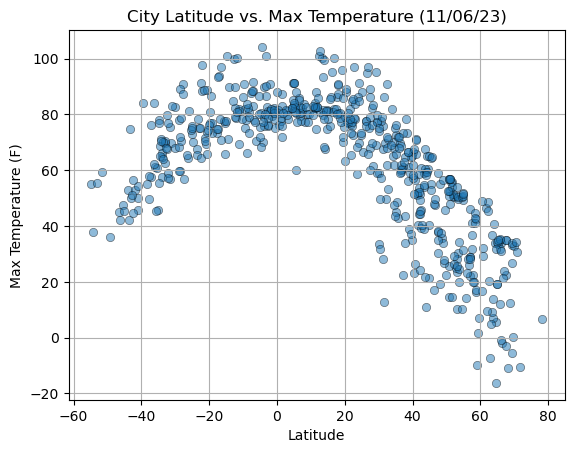

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black", 
    linewidths=0.5, 
    marker="o", 
    alpha=0.5, 
    label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

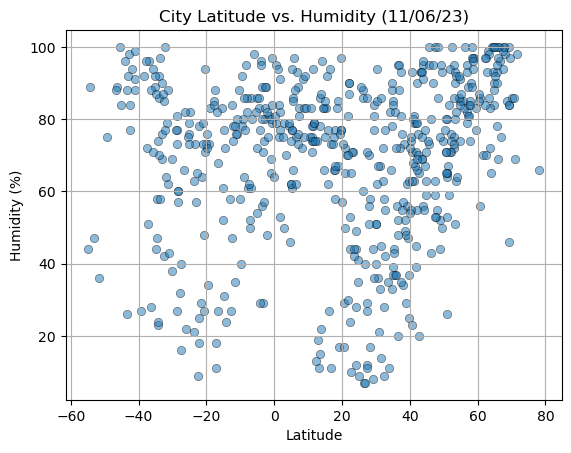

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black", 
    linewidths=0.5, 
    marker="o", 
    alpha=0.5, 
    label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

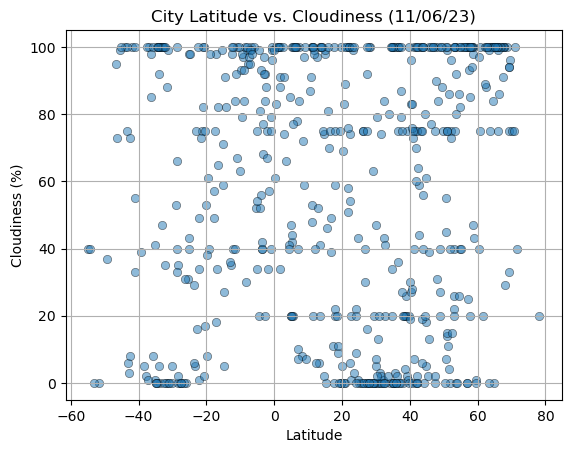

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black", 
    linewidths=0.5, 
    marker="o", 
    alpha=0.5, 
    label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

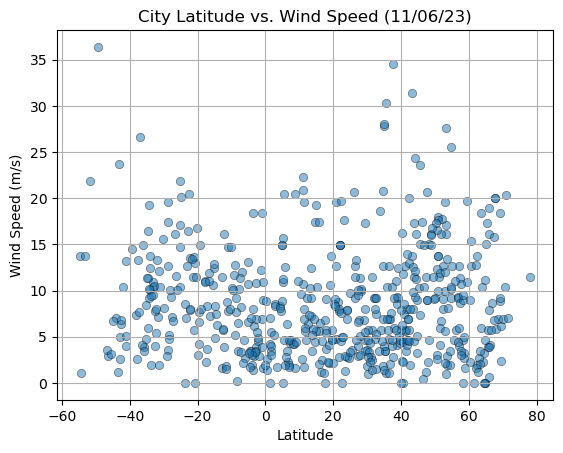

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=0.5, 
    marker="o", 
    alpha=0.5, 
    label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
def plot_lr(x_values, y_values, title, text_coordinates):
    
    # Linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=10,color="red")
    plt.xlabel('Latitude')
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,shahr-e babak,30.1165,55.1186,58.87,40,5,3.58,IR,1699284435
3,stanley,54.8680,-1.6985,49.19,85,40,9.22,GB,1699284435
4,ilulissat,69.2167,-51.1000,26.62,46,75,18.41,GL,1699284435
6,farah,32.5000,62.5000,61.97,58,84,1.54,AF,1699284435
10,saudarkrokur,65.7461,-19.6394,34.99,78,100,3.89,IS,1699284437


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,50.13,92,6,4.97,AU,1699284434
1,ushuaia,-54.8000,-68.3000,55.06,44,40,13.80,AR,1699284349
5,hithadhoo,-0.6000,73.0833,81.27,79,100,10.96,MV,1699284435
7,bel ombre,-4.6167,55.4167,80.44,83,20,3.44,SC,1699284436
8,daru,-9.0763,143.2092,78.08,80,97,12.77,PG,1699284436


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6979734654867326


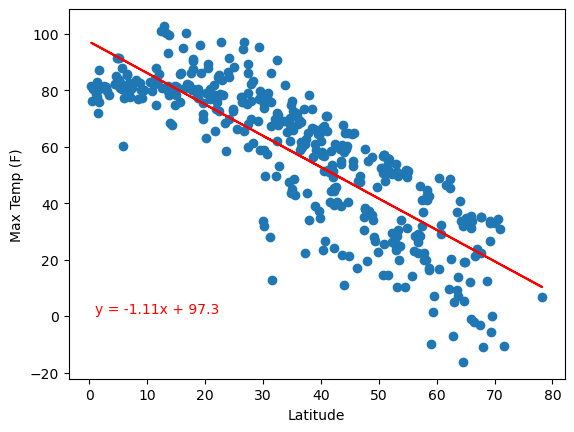

In [30]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
plot_lr(x_values, y_values, 'Max Temp',(1,1))

The r-value is: 0.4873253990929424


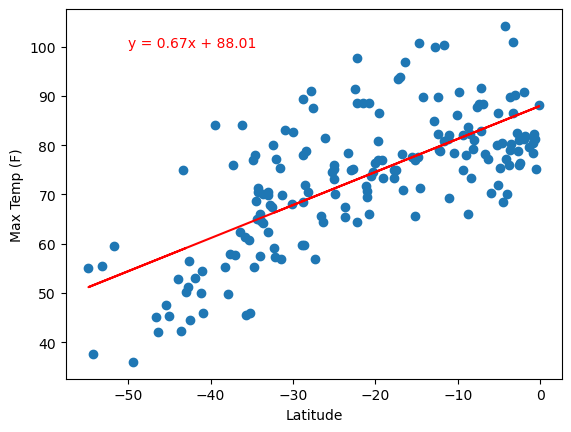

In [29]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
plot_lr(x_values, y_values, 'Max Temp',(-50,100))

**Discussion about the linear relationship:** A higher rvalue seems to indicate a stronger correlation. In the northern hemisphere, the r value is larger which is showing that the correlation between all the samples is stronger than in the southern hemisphere and we can even see that the data in the north look more clumped together and in the south they are more scattered.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06837805841091506


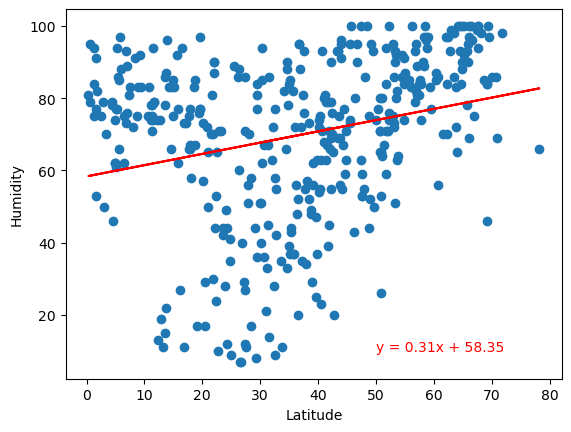

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_lr(x_values, y_values, 'Humidity',(50,10))

The r-value is: 5.206889139821709e-08


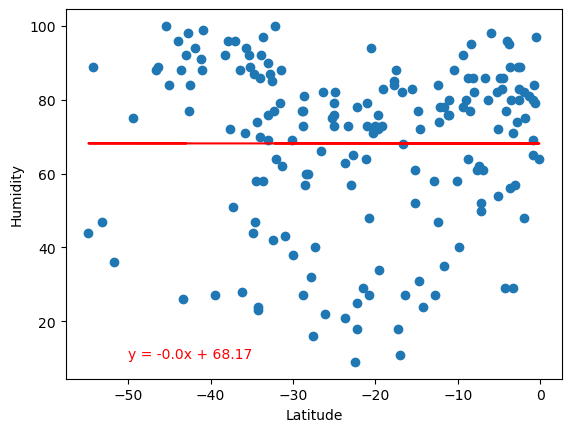

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
plot_lr(x_values, y_values, 'Humidity',(-50,10))

**Discussion about the linear relationship:** My southern hemisphere data looks like there isn't much correlation but is still consistent that a higher rvalue indicates a stronger correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.016568702324170334


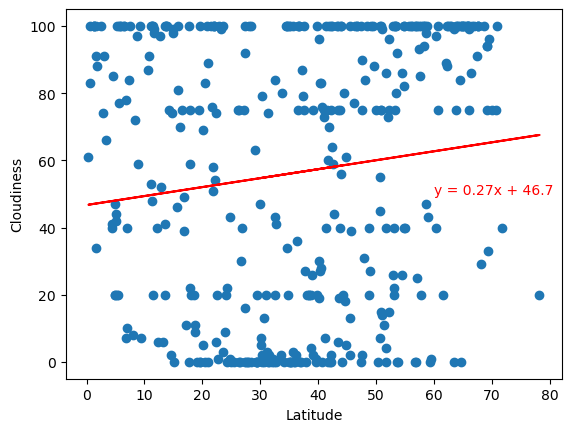

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_lr(x_values, y_values, 'Cloudiness',(60,50))

The r-value is: 0.06813969036309071


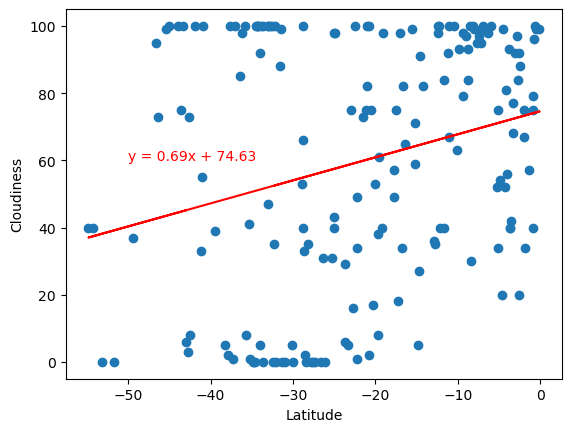

In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
plot_lr(x_values, y_values, 'Cloudiness',(-50,60))

**Discussion about the linear relationship:** A higher rvalue is still showing a strong correlation in this example.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.015549220826407072


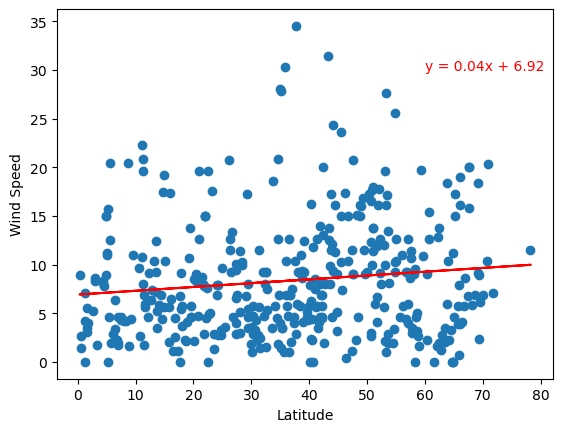

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_lr(x_values, y_values, 'Cloudiness',(60,30))

The r-value is: 0.052415080097461715


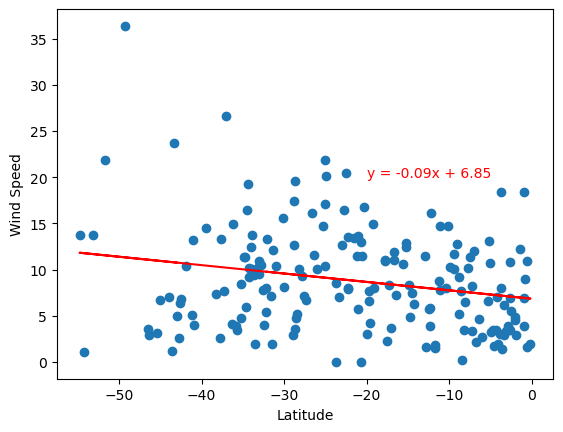

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
plot_lr(x_values, y_values, 'Cloudiness',(-20,20))

**Discussion about the linear relationship:** This example also shows that a larger rvalue indicates a stronger correlation